In [2]:
from decodanda import Decodanda, FakeSession
from decodanda.visualize import visualize_raster

In [4]:
# We create a synthetic data set where neurons respond to two variables, labeled as
#  - behaviour_letter (taking values A, B)
#  - behaviour_number (taking values 1, 2)
# neural activity is stored under the 'raster' keyword

my_session = FakeSession(n_neurons=150,
                         ndata=500,
                         noise_amplitude=0.05,
                         coding_fraction=0.3,
                         rotate=True,
                         symplex=False)

print(my_session.behaviour_letter[:30])
print(my_session.behaviour_number[:30])
visualize_raster(my_session.raster)


['A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A'
 'A' 'A']
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


/Users/lorenzo/Desktop/Research/Decodanda/decodanda/utilities.py:209: ComplexWarning: Casting complex values to real discards the imaginary part
  self.raster[i, :] = np.dot(self.raster[i, :], M)


 40%|████      | 4/10 [00:00<00:00, 32.90it/s]

		[Decodanda]	building conditioned rasters for session SessioneFinta1.0
			(behaviour_letter = A, behaviour_number = 1):	Selected 70 time bin out of 500, divided into 6 trials 
			(behaviour_letter = A, behaviour_number = 2):	Selected 104 time bin out of 500, divided into 5 trials 
			(behaviour_letter = B, behaviour_number = 1):	Selected 192 time bin out of 500, divided into 8 trials 
			(behaviour_letter = B, behaviour_number = 2):	Selected 134 time bin out of 500, divided into 6 trials 



Testing decoding performance for semantic dichotomy:  behaviour_letter

[decode_dichotomy]	Decoding - 192 time bins - 150 neurons - 1 brains
		(B1) (B2)
			vs.
		(A1) (A2)

Looping over decoding cross validation folds:


  4%|▍         | 1/25 [00:00<00:04,  5.96it/s]


[decode_with_nullmodel]	 data <p> = 0.70

[decode_with_nullmodel]	Looping over null model shuffles.


100%|██████████| 25/25 [00:05<00:00,  4.77it/s]
/Users/lorenzo/Desktop/Research/Other/PythonEnvs/venv3_BS/lib/python3.8/site-packages/numpy/core/_asarray.py:171: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, dtype, copy=False, order=order, subok=True)
 40%|████      | 4/10 [00:00<00:00, 33.33it/s]


Testing decoding performance for semantic dichotomy:  behaviour_number

[decode_dichotomy]	Decoding - 192 time bins - 150 neurons - 1 brains
		(A2) (B2)
			vs.
		(A1) (B1)

Looping over decoding cross validation folds:


  4%|▍         | 1/25 [00:00<00:04,  5.55it/s]


[decode_with_nullmodel]	 data <p> = 0.72

[decode_with_nullmodel]	Looping over null model shuffles.


100%|██████████| 25/25 [00:04<00:00,  5.16it/s]
/Users/lorenzo/Desktop/Research/Other/PythonEnvs/venv3_BS/lib/python3.8/site-packages/numpy/core/_asarray.py:171: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, dtype, copy=False, order=order, subok=True)


({'behaviour_letter': 0.6979166666666667,
  'behaviour_number': 0.7239583333333333},
 {'behaviour_letter': array([0.49635417, 0.48359375, 0.47526042, 0.49036458, 0.50546875,
         0.54101563, 0.51914063, 0.50755208, 0.50325521, 0.46041667,
         0.53984375, 0.52695313, 0.46705729, 0.50794271, 0.52395833,
         0.46106771, 0.5125    , 0.47786458, 0.42916667, 0.48125   ,
         0.48072917, 0.53424479, 0.54947917, 0.490625  , 0.53268229]),
  'behaviour_number': array([0.5453125 , 0.48255208, 0.51080729, 0.54856771, 0.44466146,
         0.57916667, 0.53385417, 0.53710938, 0.54375   , 0.49114583,
         0.49947917, 0.47513021, 0.54049479, 0.48841146, 0.47877604,
         0.5359375 , 0.54609375, 0.55130208, 0.48085937, 0.51848958,
         0.5234375 , 0.55481771, 0.50611979, 0.53033854, 0.51809896])})

/Users/lorenzo/Desktop/Research/Other/PythonEnvs/venv3_BS/lib/python3.8/site-packages/IPython/core/pylabtools.py:151: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  fig.canvas.print_figure(bytes_io, **kw)


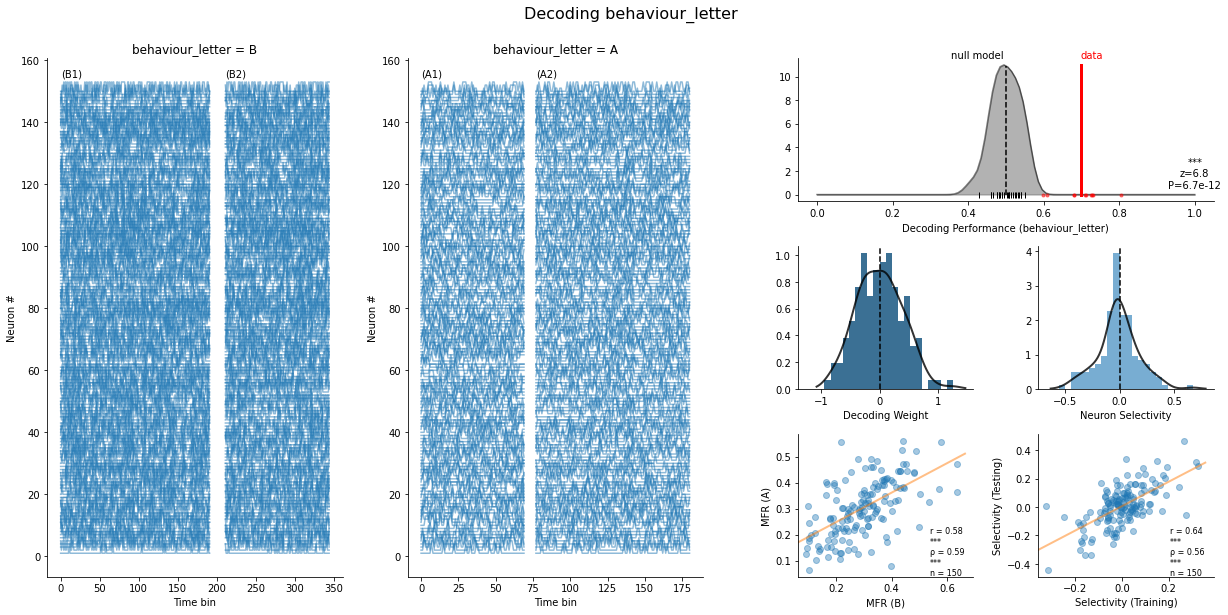

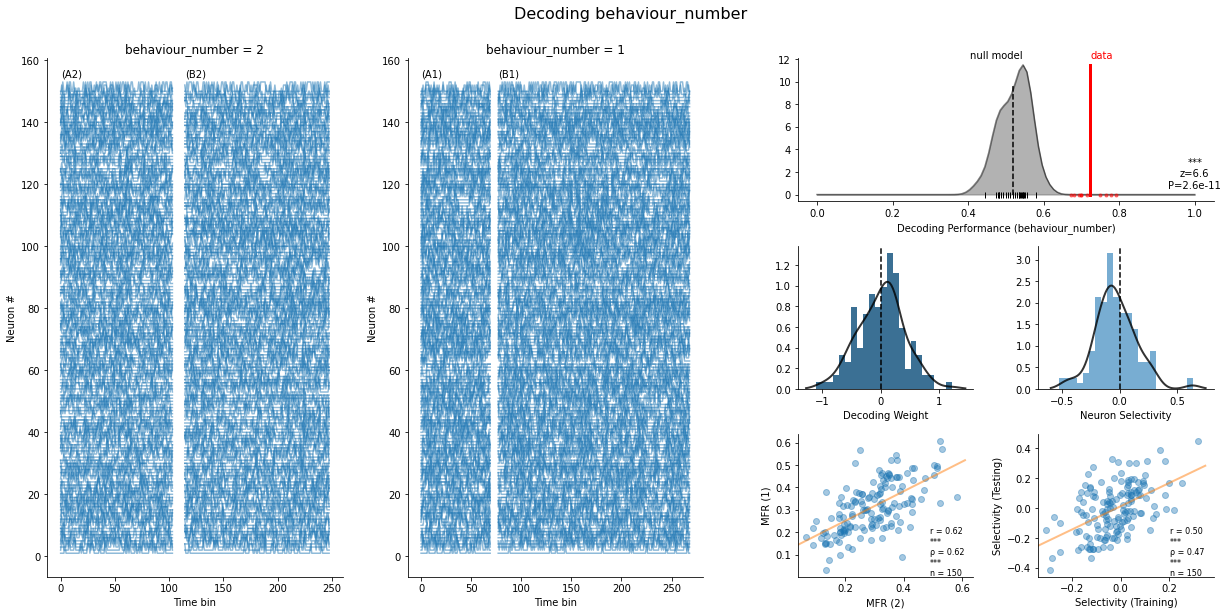

In [6]:
# We can use the Decodanda class to decode these two binary variables

dec = Decodanda(sessions=my_session,
                neural_attr='raster',
                conditions={
                    'behaviour_letter': ['A', 'B'],
                    'behaviour_number': [1, 2]
                },
                verbose=True)

perfs, null = dec.decode(training_fraction=0.8, plot_all=True)
